In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc
import os
import enlighten
import pandas as pd
import glob
import scanpy as sc 
import sys 
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import glob
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import random
warnings.filterwarnings('ignore')
sys.path.append('../../src')

In [3]:
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography

In [4]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/mouse_kidney_13.h5ad')
adata

AnnData object with n_obs × n_vars = 8509 × 3058
    obs: 'ct1', 'ct2', 'ct3', 'ct4', 'cond', 'medulla_cortex', 'domain', 'cell_type', 'cell_type_int'
    uns: 'cell_thresholds', 'cell_type_colors', 'neighbors', 'pca', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [5]:
from spaceoracle.virtual_tissue import VirtualTissue

In [6]:
adata.obs.cell_type.value_counts()

cell_type
Myeloid                5266
Endothelial            1779
Epithelial              462
B                       442
T                       361
Mesenchymal_Stromal     128
NK                       71
Name: count, dtype: int64

In [7]:
color_dict = {
    'Mac_0': "#9671c3",
    'Mac_2': "#69a75f"}

In [13]:
kidney = VirtualTissue(
    adata = adata,
    annot = 'ct3',
    # betadatas_path = '/Volumes/SSD/lasso_runs/human_tonsil',
    ko_path = '/Users/koush/Desktop', 
    color_dict=color_dict
)

In [14]:
kidney.init_cartography(adata, 
    restrict_to=[
        'Mac_2',
        'Mac_0'
    ]
)

In [20]:
perturbed_df = pd.read_parquet(f'/Users/koush/Downloads/Mif_KO_Epithelial.parquet')

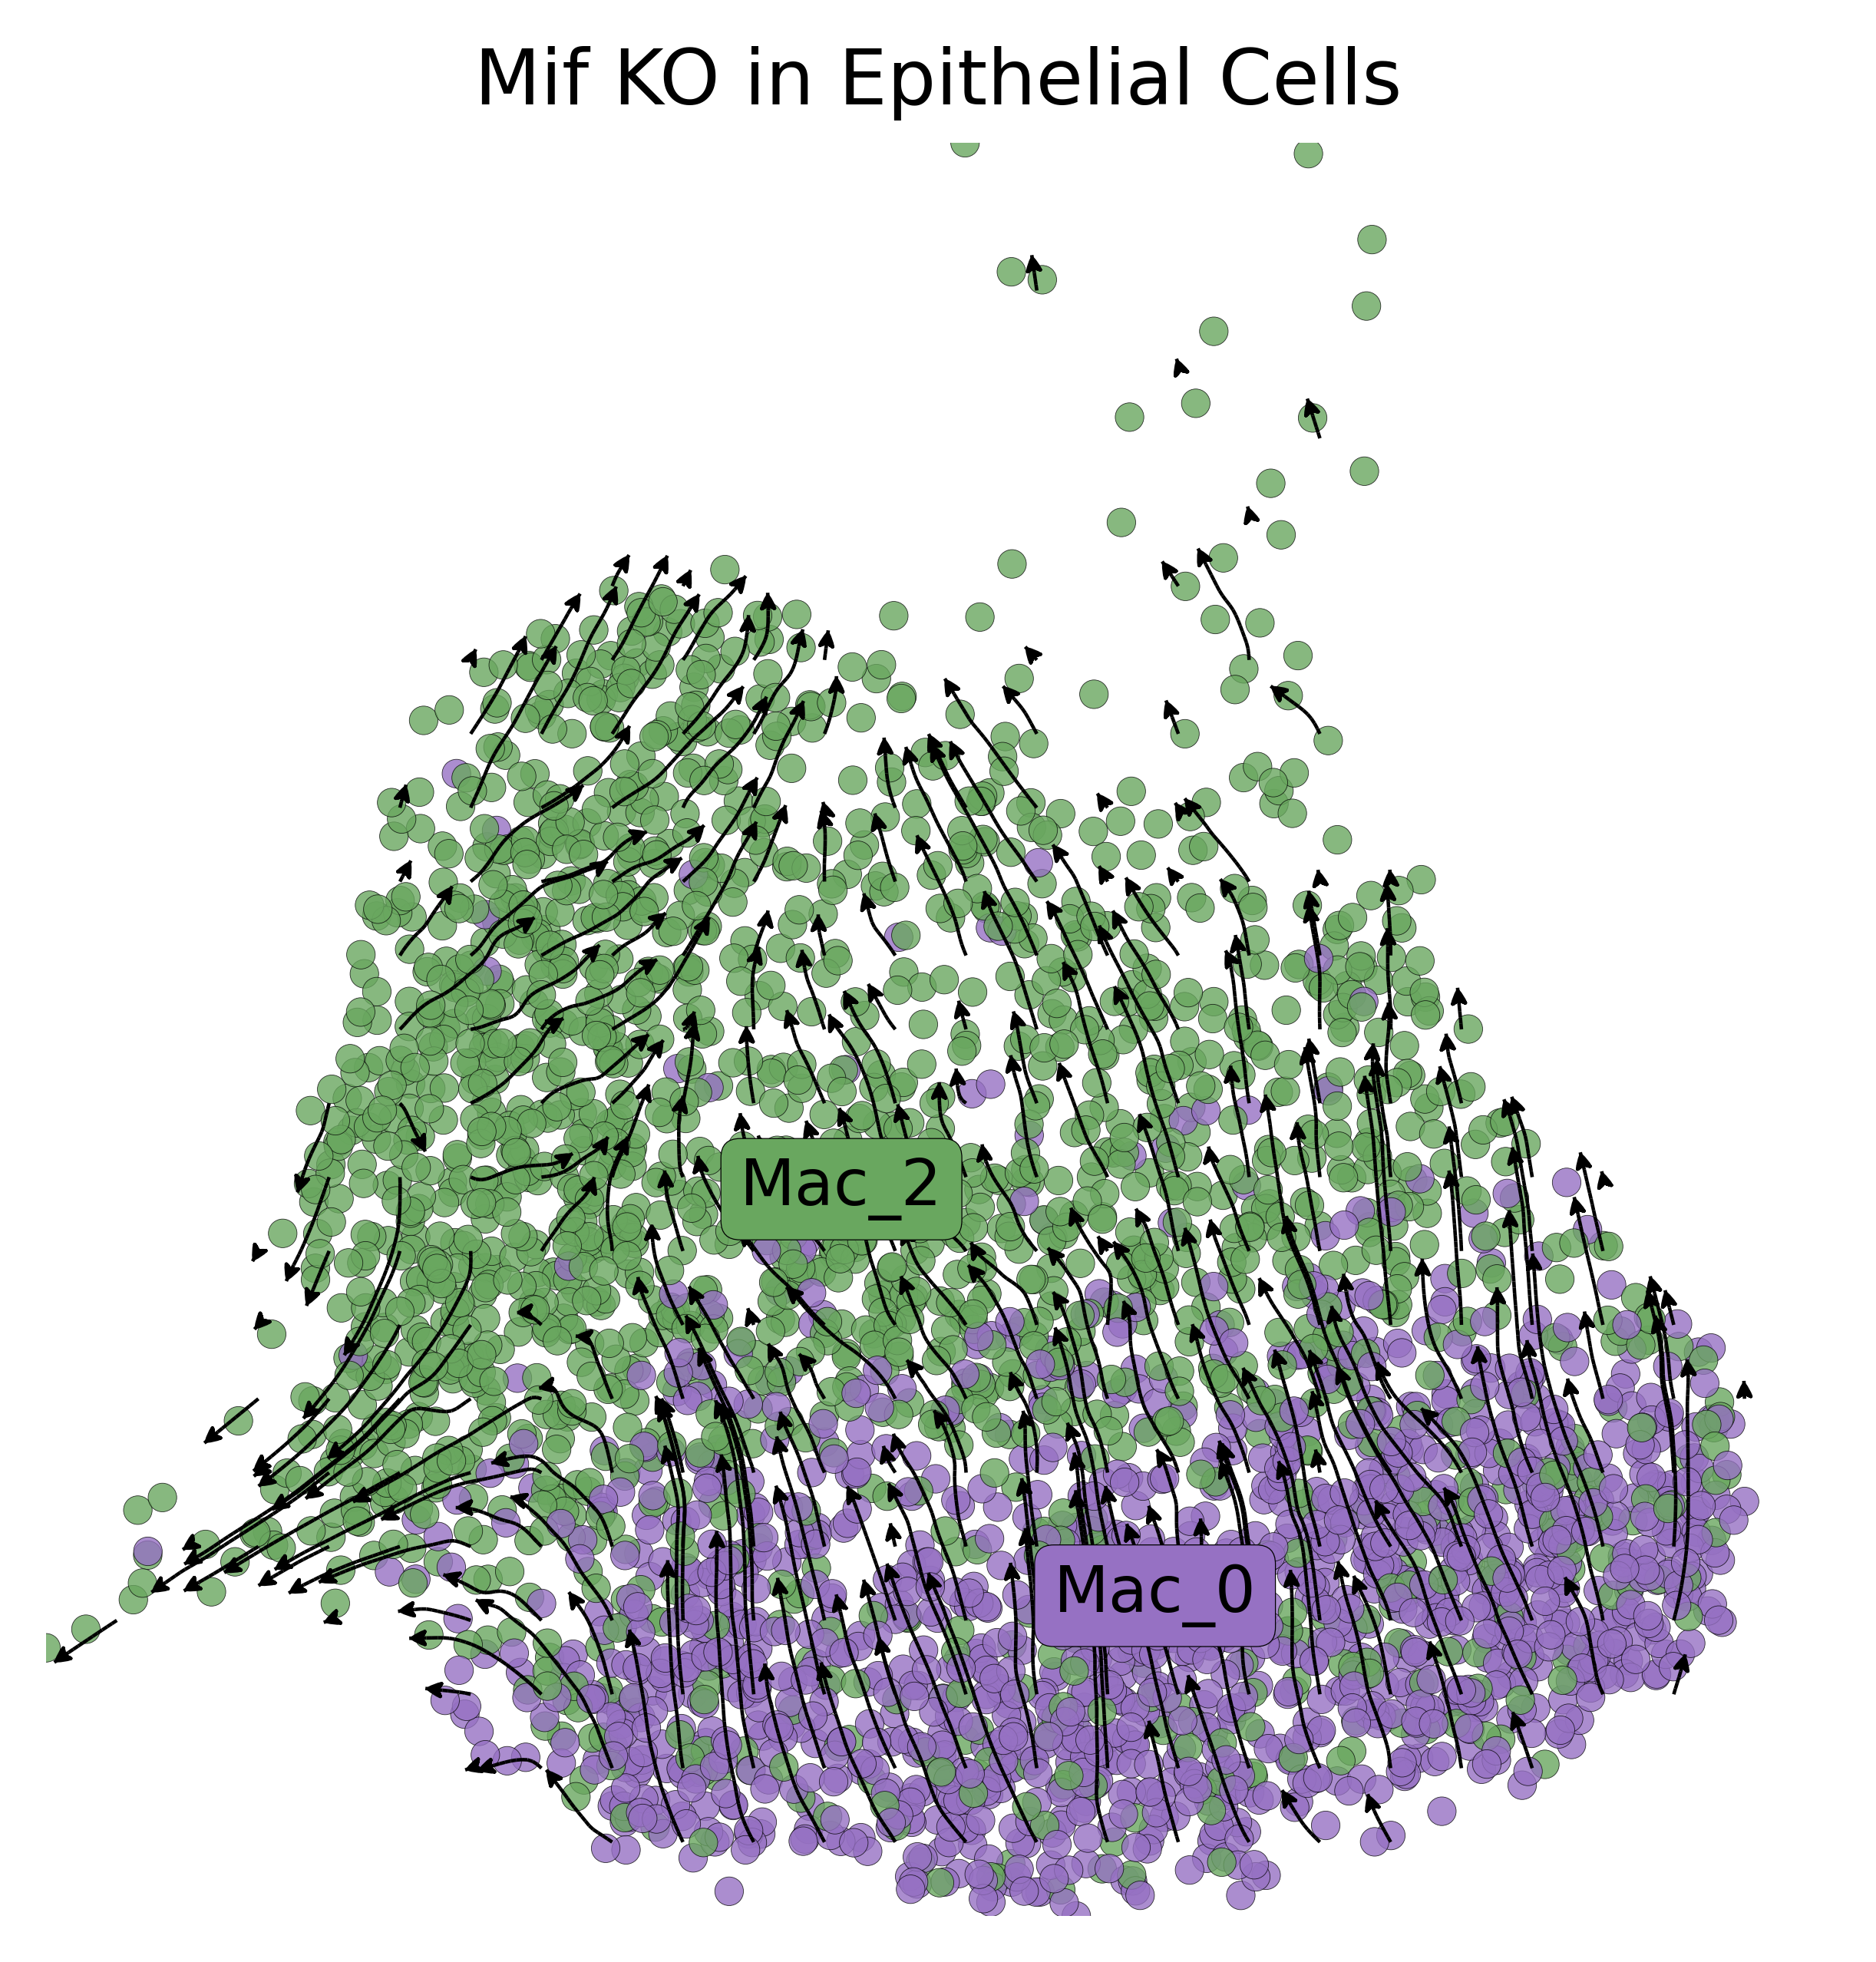

In [31]:
kidney.plot_arrows(
    perturb_target='Mif', 
    mode='0',
    perturbed_df=perturbed_df,
    hue='ct3',
    curve=True,
    vector_scale=1, 
    grid_scale=2,
    n_neighbors=300,
    scale=10,
    grains=25,
    limit_clusters=True,
    scatter_size=20,
    legend_fontsize=10,
    highlight_clusters=[
        'Mac_2',
        'Mac_0'
    ],
    grey_out=False
)

plt.title('Mif KO in Epithelial Cells')
plt.show()

In [19]:
%%capture

for i in range(1, 11):
    kidney.plot_arrows(
        perturb_target='Mif', 
        mode='0',
        hue='ct3',
        curve=True,
        vector_scale=1, 
        grid_scale=2,
        n_neighbors=300,
        scale=i,
        grains=25,
        limit_clusters=True,
        scatter_size=20,
        legend_fontsize=10,
        highlight_clusters=[
            'Mac_2',
            'Mac_0'
        ],
        grey_out=False
    )

    plt.title('Mif KO in Epithelial Cells')
    plt.savefig(f'/tmp/Mif_KO_in_Epithelial_Cells_{i}.png')
    plt.show()